In [1]:
import json
import threading
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
plt.style.use('bmh')

def preprocess(data):
    time_series = list()
    for ii in data[0]:
        database = list()
        for i in ii[0]:
            database.append(list(i))
        time_series.append(database)
    return np.nan_to_num(np.array(time_series))

import warnings
warnings.simplefilter(action='ignore')

def sigificant_digit(number, digits=2):
    return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)

In [2]:
test_data = ['AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'LSST',
             'Epilepsy', 'NATOPS', 'UWaveGestureLibrary', 'JapaneseVowels', 
            ]  # 'Heartbeat', 'StandWalkJump'

###  UEA

In [3]:
_dir = 'UEA2018'

with open("results/jabba1_info1.json", 'r') as f:
    jabba1_info = json.load(f) 

with open("results/jabba2_info1.json", 'r') as f:
    jabba2_info = json.load(f) 
    
with open("results/qabba1_info1.json", 'r') as f:
    qabba1_info = json.load(f) 
    
with open("results/qabba2_info1.json", 'r') as f:
    qabba2_info = json.load(f) 

mean_st_jabba1 = list()
mean_mse_jabba1 = list()
mean_dtw_jabba1 = list()
mean_sb_jabba1 = list()
mean_rt_jabba1 = list()
mean_dt_jabba1 = list()

mean_st_jabba2 = list()
mean_mse_jabba2 = list()
mean_dtw_jabba2 = list()
mean_sb_jabba2 = list()
mean_rt_jabba2 = list()
mean_dt_jabba2 = list()

mean_st_qabba1 = list()
mean_mse_qabba1 = list()
mean_dtw_qabba1 = list()
mean_sb_qabba1 = list()
mean_rt_qabba1 = list()
mean_dt_qabba1 = list()

mean_st_qabba2 = list()
mean_mse_qabba2 = list()
mean_dtw_qabba2 = list()
mean_sb_qabba2 = list()
mean_rt_qabba2 = list()
mean_dt_qabba2 = list()


for i in range(len(test_data)):
    filename=test_data[i]
    data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
    multivariate_ts_train = preprocess(data)
    data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TEST.arff')))
    data = preprocess(data)
    
    size = data.shape[1]*data.shape[2] * 32
    storage_jabba1, dtw_jabba1, mse_jabba1, timing_jabba1, nm_symbols_jabba1, digit_timing_jabba1 = jabba1_info[i]
    storage_jabba2, dtw_jabba2, mse_jabba2, timing_jabba2, nm_symbols_jabba2, digit_timing_jabba2 = jabba2_info[i]
    storage_qabba1, dtw_qabba1, mse_qabba1, timing_qabba1, nm_symbols_qabba1, digit_timing_qabba1 = qabba1_info[i]
    storage_qabba2, dtw_qabba2, mse_qabba2, timing_qabba2, nm_symbols_qabba2, digit_timing_qabba2 = qabba2_info[i]
    
    mean_st_jabba1.append(sigificant_digit(np.mean(np.array(storage_jabba1) / size) ))
    mean_mse_jabba1.append(sigificant_digit(np.mean(mse_jabba1)))
    mean_dtw_jabba1.append(sigificant_digit(np.mean(dtw_jabba1)))
    mean_sb_jabba1.append(sigificant_digit(np.mean(nm_symbols_jabba1)))
    mean_rt_jabba1.append(sigificant_digit(np.mean(timing_jabba1)*1000))
    mean_dt_jabba1.append(sigificant_digit(np.mean(digit_timing_jabba1)*1000))
    
    print(test_data[i], 
          "JABBA (GA) mse:", mean_mse_jabba1[-1],
          ", dtw:", mean_dtw_jabba1[-1], 
          ", symbols used:", mean_sb_jabba1[-1],  
          ", storage:", mean_st_jabba1[-1], 
          ", digit runtime:", mean_dt_jabba1[-1],  
          ", runtime:", mean_rt_jabba1[-1]
    )
    
    mean_st_jabba2.append(sigificant_digit(np.mean(np.array(storage_jabba2) / size) ))
    mean_mse_jabba2.append(sigificant_digit(np.mean(mse_jabba2)))
    mean_dtw_jabba2.append(sigificant_digit(np.mean(dtw_jabba2)))
    mean_sb_jabba2.append(sigificant_digit(np.mean(nm_symbols_jabba2)))
    mean_rt_jabba2.append(sigificant_digit(np.mean(timing_jabba2)*1000))
    mean_dt_jabba2.append(sigificant_digit(np.mean(digit_timing_jabba2)*1000))
    print(test_data[i], 
          "JABBA (VQ) mse:", mean_mse_jabba2[-1],
          ", dtw:", mean_dtw_jabba2[-1], 
          ", symbols used:", mean_sb_jabba2[-1],  
          ", storage:", mean_st_jabba2[-1], 
          ", digit runtime:", mean_dt_jabba2[-1],  
          ", runtime:", mean_rt_jabba2[-1]
    )
    
    mean_st_qabba1.append(sigificant_digit(np.mean(np.array(storage_qabba1) / size) ))
    mean_mse_qabba1.append(sigificant_digit(np.mean(mse_qabba1)))
    mean_dtw_qabba1.append(sigificant_digit(np.mean(dtw_qabba1)))
    mean_sb_qabba1.append(sigificant_digit(np.mean(nm_symbols_qabba1)))
    mean_rt_qabba1.append(sigificant_digit(np.mean(timing_qabba1)*1000))
    mean_dt_qabba1.append(sigificant_digit(np.mean(digit_timing_qabba1)*1000))
    print(test_data[i], 
          "QABBA (GA) mse:", mean_mse_qabba1[-1],
          ", dtw:", mean_dtw_qabba1[-1], 
          ", symbols used:", mean_sb_qabba1[-1],  
          ", storage:", mean_st_qabba1[-1], 
          ", digit runtime:", mean_dt_qabba1[-1],  
          ", runtime:", mean_rt_qabba1[-1]
    )
    
    mean_st_qabba2.append(sigificant_digit(np.mean(np.array(storage_qabba2) / size ) ))
    mean_mse_qabba2.append(sigificant_digit(np.mean(mse_qabba2)))
    mean_dtw_qabba2.append(sigificant_digit(np.mean(dtw_qabba2)))
    mean_sb_qabba2.append(sigificant_digit(np.mean(nm_symbols_qabba2)))
    mean_rt_qabba2.append(sigificant_digit(np.mean(timing_qabba2)*1000))
    mean_dt_qabba2.append(sigificant_digit(np.mean(digit_timing_qabba2)*1000))
    
    print(test_data[i], 
          "QABBA (VQ) mse:", mean_mse_qabba2[-1],
          ", dtw:", mean_dtw_qabba2[-1], 
          ", symbols used:", mean_sb_qabba2[-1],  
          ", storage:", mean_st_qabba2[-1], 
          ", digit runtime:", mean_dt_qabba2[-1],  
          ", runtime:", mean_rt_qabba2[-1]
    )
    print()
    
mseDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
stDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
dtwDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
sbDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
dtDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
rtDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])

mseDF['ABBA'] = mean_mse_jabba2
mseDF['fABBA'] = mean_mse_jabba1
mseDF['QABBA (VQ)'] = mean_mse_qabba2
mseDF['QABBA (GA)'] = mean_mse_qabba1

dtwDF['ABBA'] = mean_dtw_jabba2
dtwDF['fABBA'] = mean_dtw_jabba1
dtwDF['QABBA (VQ)'] = mean_dtw_qabba2
dtwDF['QABBA (GA)'] = mean_dtw_qabba1

sbDF['ABBA'] = mean_sb_jabba2
sbDF['fABBA'] = mean_sb_jabba1
sbDF['QABBA (VQ)'] = mean_sb_qabba2
sbDF['QABBA (GA)'] = mean_sb_qabba1

dtDF['ABBA'] = mean_dt_jabba2
dtDF['fABBA'] = mean_dt_jabba1
dtDF['QABBA (VQ)'] = mean_dt_qabba2
dtDF['QABBA (GA)'] = mean_dt_qabba1

rtDF['ABBA'] = mean_rt_jabba2
rtDF['fABBA'] = mean_rt_jabba1
rtDF['QABBA (VQ)'] = mean_rt_qabba2
rtDF['QABBA (GA)'] = mean_rt_qabba1

stDF['ABBA'] = mean_st_jabba2
stDF['fABBA'] = mean_st_jabba1
stDF['QABBA (VQ)'] = mean_st_qabba2
stDF['QABBA (GA)'] = mean_st_qabba1

mseDF.to_csv("results/mseDF1.csv")
dtwDF.to_csv("results/dtwDF1.csv")
sbDF.to_csv("results/sbDF1.csv")
stDF.to_csv("results/sbDF1.csv")
dtDF.to_csv("results/dtDF1.csv")
rtDF.to_csv("results/rtDF1.csv")

AtrialFibrillation JABBA (GA) mse: 0.7 , dtw: 180.0 , symbols used: 130.0 , storage: 0.33 , digit runtime: 5.9 , runtime: 110.0
AtrialFibrillation JABBA (VQ) mse: 0.092 , dtw: 26.0 , symbols used: 130.0 , storage: 0.33 , digit runtime: 2000.0 , runtime: 1200.0
AtrialFibrillation QABBA (GA) mse: 1.8 , dtw: 180.0 , symbols used: 130.0 , storage: 0.2 , digit runtime: 98.0 , runtime: 180.0
AtrialFibrillation QABBA (VQ) mse: 1.2 , dtw: 30.0 , symbols used: 130.0 , storage: 0.2 , digit runtime: 1700.0 , runtime: 1300.0

BasicMotions JABBA (GA) mse: 0.48 , dtw: 37.0 , symbols used: 78.0 , storage: 0.48 , digit runtime: 4.1 , runtime: 160.0
BasicMotions JABBA (VQ) mse: 0.17 , dtw: 15.0 , symbols used: 78.0 , storage: 0.48 , digit runtime: 770.0 , runtime: 980.0
BasicMotions QABBA (GA) mse: 0.68 , dtw: 37.0 , symbols used: 78.0 , storage: 0.3 , digit runtime: 3.4 , runtime: 180.0
BasicMotions QABBA (VQ) mse: 0.38 , dtw: 15.0 , symbols used: 78.0 , storage: 0.3 , digit runtime: 780.0 , runtime: 

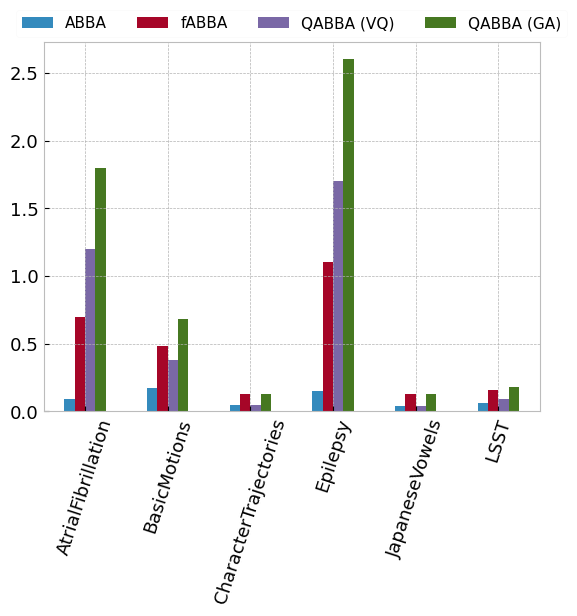

In [4]:
ind_name = ["AtrialFibrillation", "BasicMotions", "CharacterTrajectories", 
            "Epilepsy", "JapaneseVowels", "LSST"]

plt.rcParams['axes.facecolor'] = 'white'
mseDF.loc[ind_name, :].plot.bar(rot=72, fontsize=13)
plt.legend(fontsize=11, framealpha=0.1, ncol=4, loc='center',bbox_to_anchor=(0.5, 1.05, 0, 0))
plt.savefig('figs/mseDF1.pdf', bbox_inches='tight') 
plt.show()

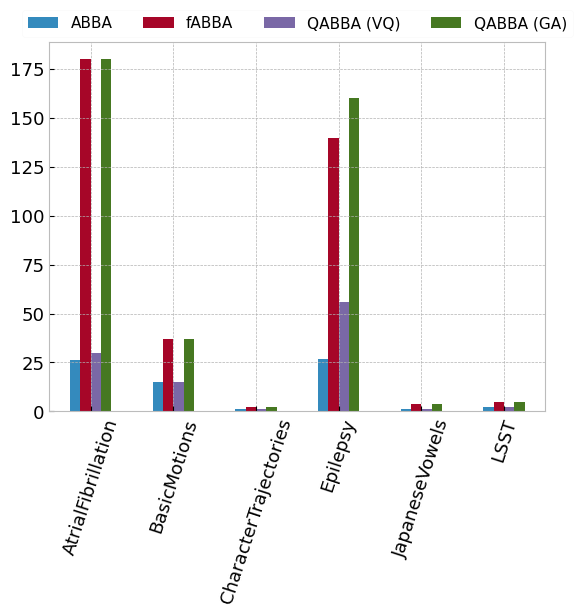

In [5]:
plt.rcParams['axes.facecolor'] = 'white'
dtwDF.loc[ind_name, :].plot.bar(rot=72, fontsize=13)
plt.legend(fontsize=11, framealpha=0.1, ncol=4, loc='center',bbox_to_anchor=(0.5, 1.05, 0, 0))
plt.savefig('figs/dtwDF1.pdf', bbox_inches='tight') 
plt.show()

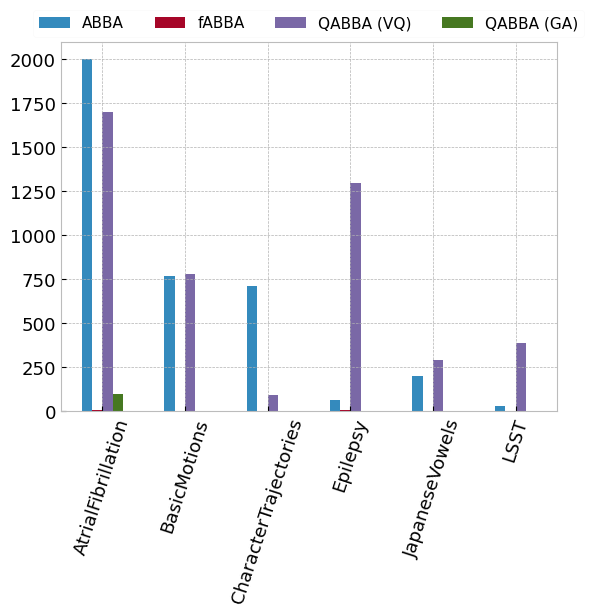

In [6]:
plt.rcParams['axes.facecolor'] = 'white'
dtDF.loc[ind_name, :].plot.bar(rot=72, fontsize=13)
plt.legend(fontsize=11, framealpha=0.1, ncol=4, loc='center',bbox_to_anchor=(0.5, 1.05, 0, 0))
plt.savefig('figs/dtDF1.pdf', bbox_inches='tight') 
plt.show()

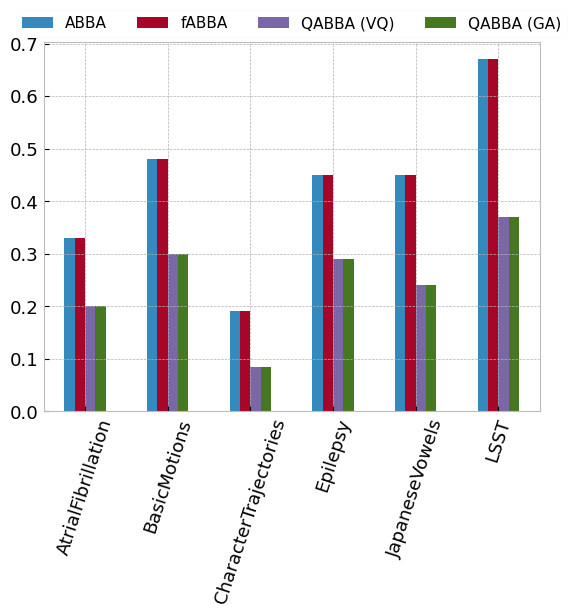

In [7]:
plt.rcParams['axes.facecolor'] = 'white'
stDF.loc[ind_name, :].plot.bar(rot=72, fontsize=13)
plt.legend(fontsize=11, framealpha=0.1, ncol=4, loc='center',bbox_to_anchor=(0.5, 1.05, 0, 0))
plt.savefig('figs/stDF1.pdf', bbox_inches='tight') 
plt.show()